In [6]:
# !pip install konlpy

     |████████████████████████████████| 19.4MB 428kB/s 
     |████████████████████████████████| 2.7MB 25.4MB/s 


In [48]:
from keras.models import Model
from keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [0]:
from nltk.tokenize import sent_tokenize
import pandas as pd
import re
from konlpy.tag import Okt
import pickle
import matplotlib.pyplot as plt
import numpy as np
okt = Okt()

In [0]:
book_data = pd.read_csv("/content/drive/My Drive/colab/BOOK_DATA/DATA/books_df.csv", index_col=0)

In [0]:
book_text = book_data['Text']

In [0]:
def clean_text(data):
  result = okt.nouns(data)
  book_list = []
  for i in result:
    if len(i) > 1 or i == '.':
      book_list.append(i)
  return book_list

In [0]:
book_text_v1 = book_text.apply(clean_text)

In [0]:
train_length = book_text_v1.apply(len)

<function matplotlib.pyplot.show>

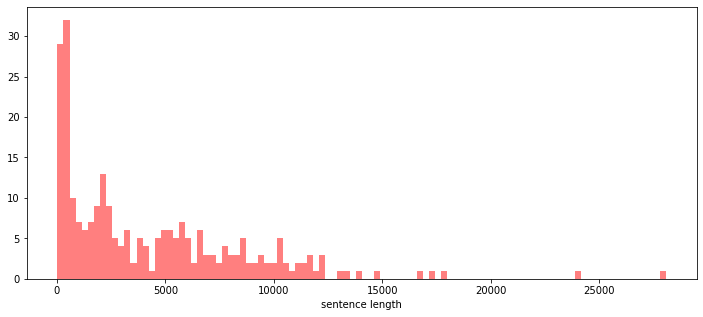

In [35]:
plt.figure(figsize = (12, 5))
plt.hist(train_length, bins = 100, alpha = 0.5, color = 'r')
plt.xlabel('sentence length')
plt.ylabel('')
plt.show

In [45]:
print('max length :', np.max(train_length))
print('min length :', np.min(train_length))
print('mean length :', np.mean(train_length))
print('75 % percentile :', np.percentile(train_length, 75))
print('85 % percentile :', np.percentile(train_length, 85))
print('std length :', np.std(train_length))

max length : 28084
min length : 27
mean length : 4356.154150197628
75 % percentile : 6681.0
85 % percentile : 8857.599999999999
std length : 4372.546991134166


In [0]:
X = book_text_v1
y = book_data['점수'].values

In [0]:
num_words = 20000
max_len = 2800
emb_size = 128

In [89]:
X

array([[  372,  2004,   280, ...,     0,     0,     0],
       [14863,   312,   835, ...,     0,     0,     0],
       [  125,    48,   125, ...,     0,     0,     0],
       ...,
       [ 1948,  2826,   374, ...,  5765,   316,   207],
       [   16,    93,    44, ...,   200,  4651,   102],
       [ 3158,   107,  5298, ...,  3047,   185,  2195]], dtype=int32)

In [0]:
tok = Tokenizer(num_words = num_words)
tok.fit_on_texts(list(X))

In [0]:
# pd.get_dummies(book_data['점수'])
X_v1 = pd.get_dummies(book_data, columns=['점수'], prefix='점수')
y = X_v1.iloc[:,4:]

In [88]:
X.shape

(253, 2800)

In [0]:
X = tok.texts_to_sequences(X)

In [0]:
X = sequence.pad_sequences(X, maxlen = max_len, padding='post')
# X_test = sequence.pad_sequences(test, maxlen = max_len, padding = 'post')

In [0]:
inp = Input(shape=(max_len, )) #maxlen=200 as defined earlier
embed_size = 256
x = Embedding(num_words, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(10, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [0]:
file_path = 'save_best'
checkpoint = ModelCheckpoint(file_path, monitor = 'val_loss', verbose = 1, save_best_only=True)
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [94]:
batch_size = 32
epochs = 500
model.fit(X,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 227 samples, validate on 26 samples
Epoch 1/500
227/227 [==============================] - 42s 187ms/step - loss: 2.2996 - acc: 0.1189 - val_loss: 2.3016 - val_acc: 0.0385
Epoch 2/500
227/227 [==============================] - 41s 181ms/step - loss: 2.2754 - acc: 0.2687 - val_loss: 2.2977 - val_acc: 0.1923
Epoch 3/500
227/227 [==============================] - 42s 183ms/step - loss: 2.2499 - acc: 0.2687 - val_loss: 2.2918 - val_acc: 0.1538
Epoch 4/500
227/227 [==============================] - 41s 181ms/step - loss: 2.2184 - acc: 0.2819 - val_loss: 2.2798 - val_acc: 0.1538
Epoch 5/500
227/227 [==============================] - 42s 186ms/step - loss: 2.1752 - acc: 0.1982 - val_loss: 2.2704 - val_acc: 0.1538
Epoch 6/500
227/227 [==============================] - 41s 182ms/step - loss: 2.1106 - acc: 0.2247 - val_loss: 2.2882 - val_acc: 0.1538
Epoch 7/500
227/227 [==============================] - 41s 181ms/step - loss: 2.0118 - acc: 0.1850 - val_loss: 2.5025 - val_acc: 0.1538
Epo

KeyboardInterrupt: ignored